In [116]:
#!pip install scanpy
#!pip install leidenalg

In [117]:
#importing required packages
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
#reading the data as an anndata (data is obtained from 10x genomics dataset collection)
adata = sc.read_10x_h5("5k_mouse_lung_CNIK_3pv3_filtered_feature_bc_matrix.h5")

In [119]:
#Making the variable names unique
adata.var_names_make_unique(join = "-") 

#Data intuition

In [120]:
#looking at all the variable from adata
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mm10
Gm1992,ENSMUSG00000089699,Gene Expression,mm10
Gm19938,ENSMUSG00000102331,Gene Expression,mm10
Gm37381,ENSMUSG00000102343,Gene Expression,mm10
Rp1,ENSMUSG00000025900,Gene Expression,mm10
...,...,...,...
AC124606.1,ENSMUSG00000095523,Gene Expression,mm10
AC133095.2,ENSMUSG00000095475,Gene Expression,mm10
AC133095.1,ENSMUSG00000094855,Gene Expression,mm10
AC234645.1,ENSMUSG00000095019,Gene Expression,mm10


In [121]:
#observations present in adata
adata.obs

""
AAACCCAAGAAAGCGA-1
AAACCCAAGACATCAA-1
AAACCCAAGGCCTGAA-1
AAACCCAAGTCAGGGT-1
AAACCCACATACAGAA-1
...
TTTGTTGCACAATGAA-1
TTTGTTGCACTATCGA-1
TTTGTTGCATCGCTAA-1
TTTGTTGTCCCATTCG-1


In [122]:
#the sparse matrix of adata
adata.X
#the data contains 7788 cells and 32285 genes

<7788x32285 sparse matrix of type '<class 'numpy.float32'>'
	with 16509750 stored elements in Compressed Sparse Row format>

In [123]:
#all the gene names from adata
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Gm37381', 'Rp1', 'Sox17', 'Gm37587',
       'Gm37323', 'Mrpl15', 'Lypla1',
       ...
       'Gm16367', 'AC163611.1', 'AC163611.2', 'AC140365.1', 'AC124606.2',
       'AC124606.1', 'AC133095.2', 'AC133095.1', 'AC234645.1', 'AC149090.1'],
      dtype='object', length=32285)

In [124]:
adata

AnnData object with n_obs × n_vars = 7788 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

#preprocessing

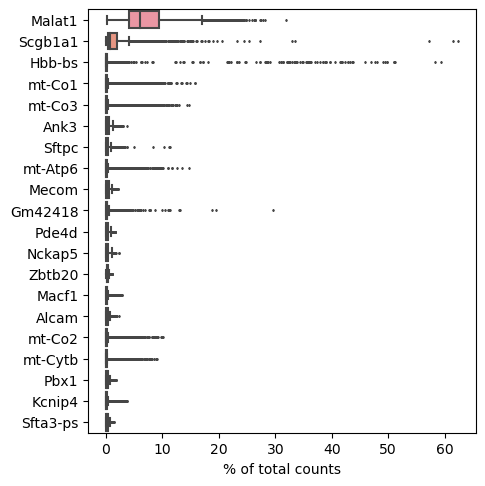

In [125]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [126]:
#filtering cells based on number of genes in a cell
#filter out cells that have less than 300 genes
sc.pp.filter_cells(adata, min_genes = 300)

In [127]:
adata
#filtered out 99 cells

AnnData object with n_obs × n_vars = 7689 × 32285
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'

In [128]:
#filtering genes based on number of cells
# filter out genes that is seen in less than 5 cells
sc.pp.filter_genes(adata, min_cells = 5)

In [129]:
adata
#filtered out 11,123 genes

AnnData object with n_obs × n_vars = 7689 × 21162
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [130]:
#checking for mitochondrial genes by checking if the varable name starts with "mt"
#and adding a new column to the data as "mt"
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
#usually the mitochondrial genes are named with mt... in mouse data

In [131]:
#checking if the column is added
adata.var

,gene_ids,feature_types,genome,n_cells,mt
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,343,False
Gm1992,ENSMUSG00000089699,Gene Expression,mm10,30,False
Gm19938,ENSMUSG00000102331,Gene Expression,mm10,71,False
Gm37381,ENSMUSG00000102343,Gene Expression,mm10,733,False
Rp1,ENSMUSG00000025900,Gene Expression,mm10,1344,False
...,...,...,...,...,...
Vamp7,ENSMUSG00000051412,Gene Expression,mm10,644,False
Spry3,ENSMUSG00000061654,Gene Expression,mm10,10,False
Tmlhe,ENSMUSG00000079834,Gene Expression,mm10,1438,False
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,mm10,25,False


In [132]:
#calling the variables that are true for mitochondrial genes
adata.var[adata.var.mt == True] 

,gene_ids,feature_types,genome,n_cells,mt
mt-Nd1,ENSMUSG00000064341,Gene Expression,mm10,3026,True
mt-Nd2,ENSMUSG00000064345,Gene Expression,mm10,3690,True
mt-Co1,ENSMUSG00000064351,Gene Expression,mm10,5325,True
mt-Co2,ENSMUSG00000064354,Gene Expression,mm10,4632,True
mt-Atp8,ENSMUSG00000064356,Gene Expression,mm10,298,True
mt-Atp6,ENSMUSG00000064357,Gene Expression,mm10,5120,True
mt-Co3,ENSMUSG00000064358,Gene Expression,mm10,5234,True
mt-Nd3,ENSMUSG00000064360,Gene Expression,mm10,1510,True
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10,695,True
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,3863,True


In [133]:
#calculating the qc metrics for mt genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top = None, log1p = False, inplace = True)

In [134]:
adata.obs
#shows the total mitochondrial counts per cell and the percentage 

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGAAAGCGA-1,2915,2914,7030.0,4.0,0.056899
AAACCCAAGACATCAA-1,2721,2719,5786.0,12.0,0.207397
AAACCCAAGGCCTGAA-1,2865,2865,7299.0,3.0,0.041102
AAACCCAAGTCAGGGT-1,2135,2135,4340.0,3.0,0.069124
AAACCCACATACAGAA-1,2827,2825,6953.0,13.0,0.186970
...,...,...,...,...,...
TTTGTTGCACAATGAA-1,436,435,574.0,19.0,3.310104
TTTGTTGCACTATCGA-1,2073,2072,5373.0,28.0,0.521124
TTTGTTGCATCGCTAA-1,1295,1294,2261.0,6.0,0.265369
TTTGTTGTCCCATTCG-1,2385,2383,6094.0,5.0,0.082048


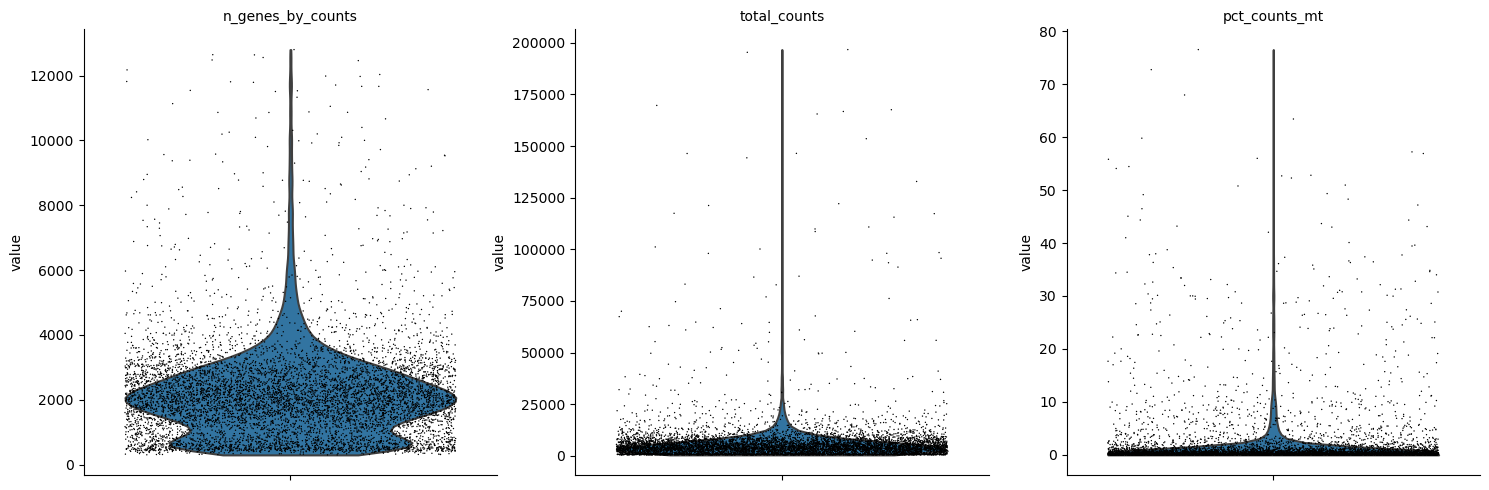

In [135]:
#violin plots of genes by counts, total counts, percentage of mt per cell
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts","pct_counts_mt"], jitter = 0.4, multi_panel = True)

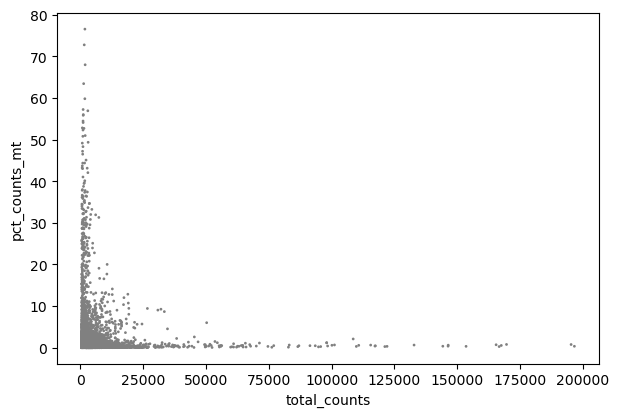

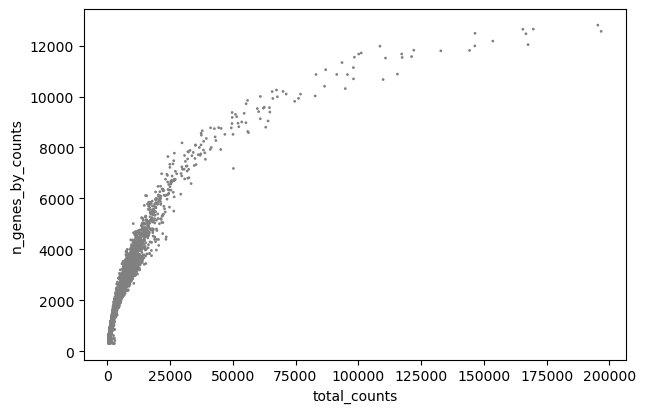

In [136]:
# scatter plot

#total counts vs percentage of mt gene
sc.pl.scatter(adata,x = "total_counts", y = "pct_counts_mt")
#total counts vs number of genes per cell
sc.pl.scatter(adata,x = "total_counts", y = "n_genes_by_counts")

In [137]:
#setting upper limit(98%) and lower limit(2%) for the number of genes by counts 
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, .02)
print(f'{lower_lim} to {upper_lim}')

#you can also filter the cells by manually looking at the graphs and picking a threshold
#adata = adata[adata.obs.n_genes_by_counts < 7000]

429.0 to 6243.599999999997


In [138]:
#filtering the adata based on the upper limit and lower limit
adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]

In [139]:
adata
#filtered out 309 genes

View of AnnData object with n_obs × n_vars = 7380 × 21162
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [140]:
#filtering genes that has more than 5% mt genes
adata = adata[adata.obs.pct_counts_mt < 5]

In [141]:
adata
#filtered out 453 genes

View of AnnData object with n_obs × n_vars = 6927 × 21162
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [142]:
adata.X[2,:].sum()
#this shows how many UMI counts are associated to one gene

7299.0

In [ ]:
#Normalizing cells to 10,000 counts
sc.pp.normalize_total(adata, target_sum = 1e4)

In [144]:
adata.X[2,:].sum()
#the count is normalized to 10,000

10000.131

In [145]:
#normalising the UMI counts to log counts
sc.pp.log1p(adata) 

In [146]:
adata.X[4,:].sum()

3453.8389

Feature selection

In [147]:
#this creates a new variable of highly_variable and adds false/true value
sc.pp.highly_variable_genes(adata)

In [148]:
adata.var

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,343,False,343,0.161139,95.539082,1239.0,True,0.280058,2.426212,2.070292
Gm1992,ENSMUSG00000089699,Gene Expression,mm10,30,False,30,0.004422,99.609832,34.0,False,0.009338,0.993722,-1.040434
Gm19938,ENSMUSG00000102331,Gene Expression,mm10,71,False,71,0.010665,99.076603,82.0,False,0.023823,1.314838,-0.343114
Gm37381,ENSMUSG00000102343,Gene Expression,mm10,733,False,733,0.361946,90.466901,2783.0,True,0.392555,2.150283,1.508414
Rp1,ENSMUSG00000025900,Gene Expression,mm10,1344,False,1344,2.233840,82.520484,17176.0,True,1.377333,3.254640,1.993627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vamp7,ENSMUSG00000051412,Gene Expression,mm10,644,False,644,0.110548,91.624398,850.0,False,0.169669,1.372062,-0.218848
Spry3,ENSMUSG00000061654,Gene Expression,mm10,10,False,10,0.001301,99.869944,10.0,False,0.003151,1.021556,-0.979991
Tmlhe,ENSMUSG00000079834,Gene Expression,mm10,1438,False,1438,0.320458,81.297958,2464.0,False,0.470875,1.626581,-0.303821
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,mm10,25,False,25,0.003251,99.674860,25.0,False,0.006314,1.203359,-0.585196


In [149]:
#calling only highly variable genes (True)
adata.var[adata.var.highly_variable]

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,343,False,343,0.161139,95.539082,1239.0,True,0.280058,2.426212,2.070292
Gm37381,ENSMUSG00000102343,Gene Expression,mm10,733,False,733,0.361946,90.466901,2783.0,True,0.392555,2.150283,1.508414
Rp1,ENSMUSG00000025900,Gene Expression,mm10,1344,False,1344,2.233840,82.520484,17176.0,True,1.377333,3.254640,1.993627
Sox17,ENSMUSG00000025902,Gene Expression,mm10,575,False,575,0.123553,92.521784,950.0,True,0.238691,1.920165,0.971384
Gm37587,ENSMUSG00000104238,Gene Expression,mm10,53,False,53,0.007023,99.310704,54.0,True,0.024581,2.102547,1.367437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd4l,ENSMUSG00000065947,Gene Expression,mm10,695,True,695,0.154246,90.961113,1186.0,True,0.144651,1.951438,1.039296
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,3863,True,3863,4.464300,49.759397,34326.0,True,1.601990,2.799273,1.188242
mt-Nd5,ENSMUSG00000064367,Gene Expression,mm10,1350,True,1350,0.451294,82.442450,3470.0,True,0.363075,1.971620,0.890163
mt-Cytb,ENSMUSG00000064370,Gene Expression,mm10,4440,True,4440,6.112628,42.255170,47000.0,True,1.950056,3.039508,1.114807


In [150]:
#saving the data before processing any more values and further filtering
adata.raw = adata 

In [151]:
adata.raw.X

<6927x21162 sparse matrix of type '<class 'numpy.float32'>'
	with 14336166 stored elements in Compressed Sparse Row format>

In [152]:
#Feature selection
#selecting genes that highly variable
adata = adata[:, adata.var.highly_variable]

In [153]:
adata

View of AnnData object with n_obs × n_vars = 6927 × 4414
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [154]:
#regress out effects of total_counts per cell
sc.pp.regress_out(adata, ["total_counts" , "pct_counts_mt"]) 

In [155]:
#scaling each gene to unit variance
sc.pp.scale(adata, max_value = 10)

Principal component Analysis

In [156]:
#calculating the pca values
sc.tl.pca(adata, svd_solver = "arpack")

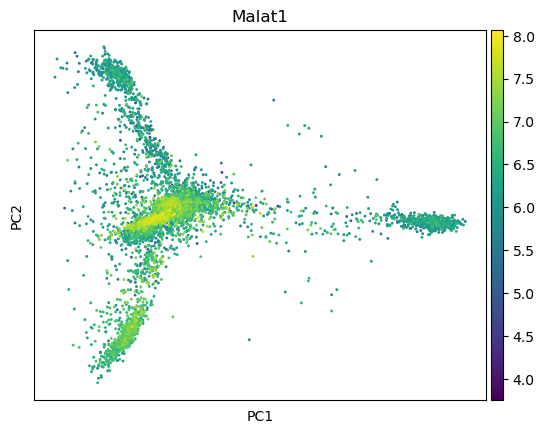

In [157]:
#creating a scatter plot in the PCA coordinated
sc.pl.pca(adata, color='Malat1')

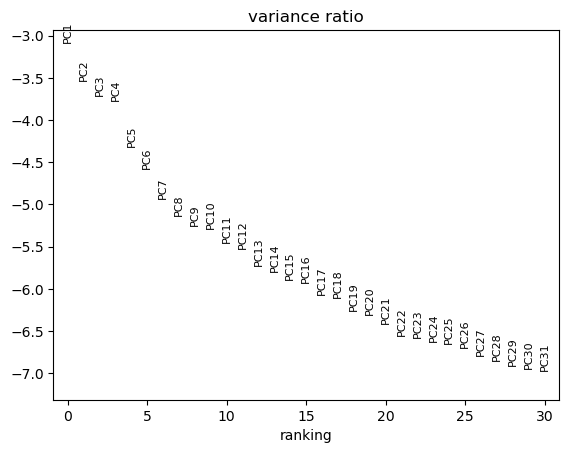

In [158]:
#plotting the pca values
sc.pl.pca_variance_ratio(adata, log = True)

#the ones on the top are the reason for variance

In [159]:
#computing the neighborhood graph
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 22)

In [160]:
#calculationg the umap
sc.tl.umap(adata) 

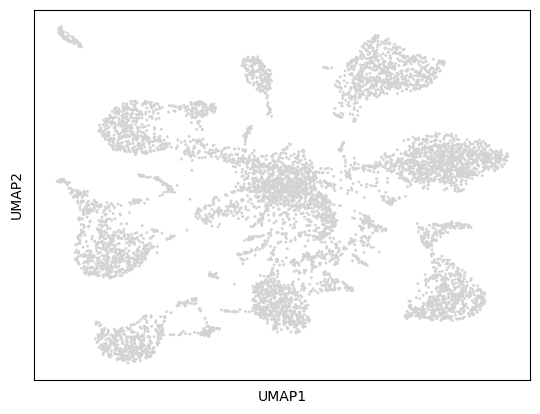

In [161]:
#plotting the umap
sc.pl.umap(adata) 

In [162]:
#!pip install leidenalg
#!pip install louvain
#!conda install -y -c anaconda cmake

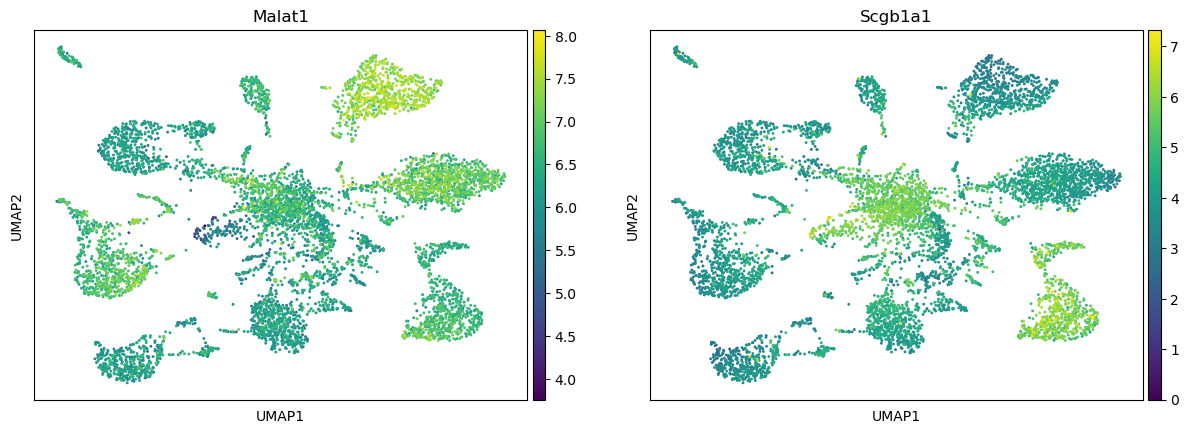

In [163]:
#plotting the umap for selected genes
sc.pl.umap(adata, color = ['Malat1', 'Scgb1a1'])

Clustering

In [164]:
#running leiden clustering
sc.tl.leiden(adata, resolution = 0.09)

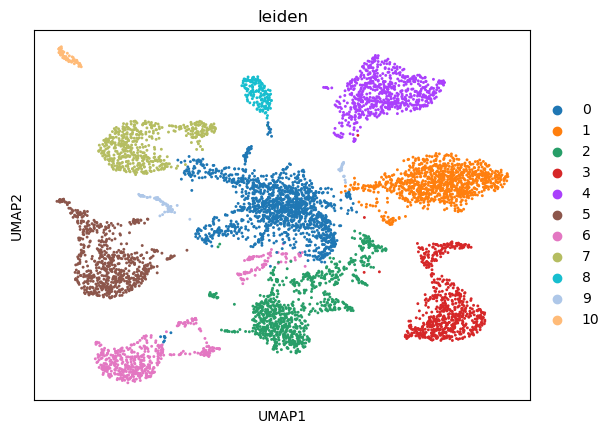

In [165]:
#plotiing the leiden cluster
sc.pl.umap(adata, color = ['leiden'])

### find marker genes

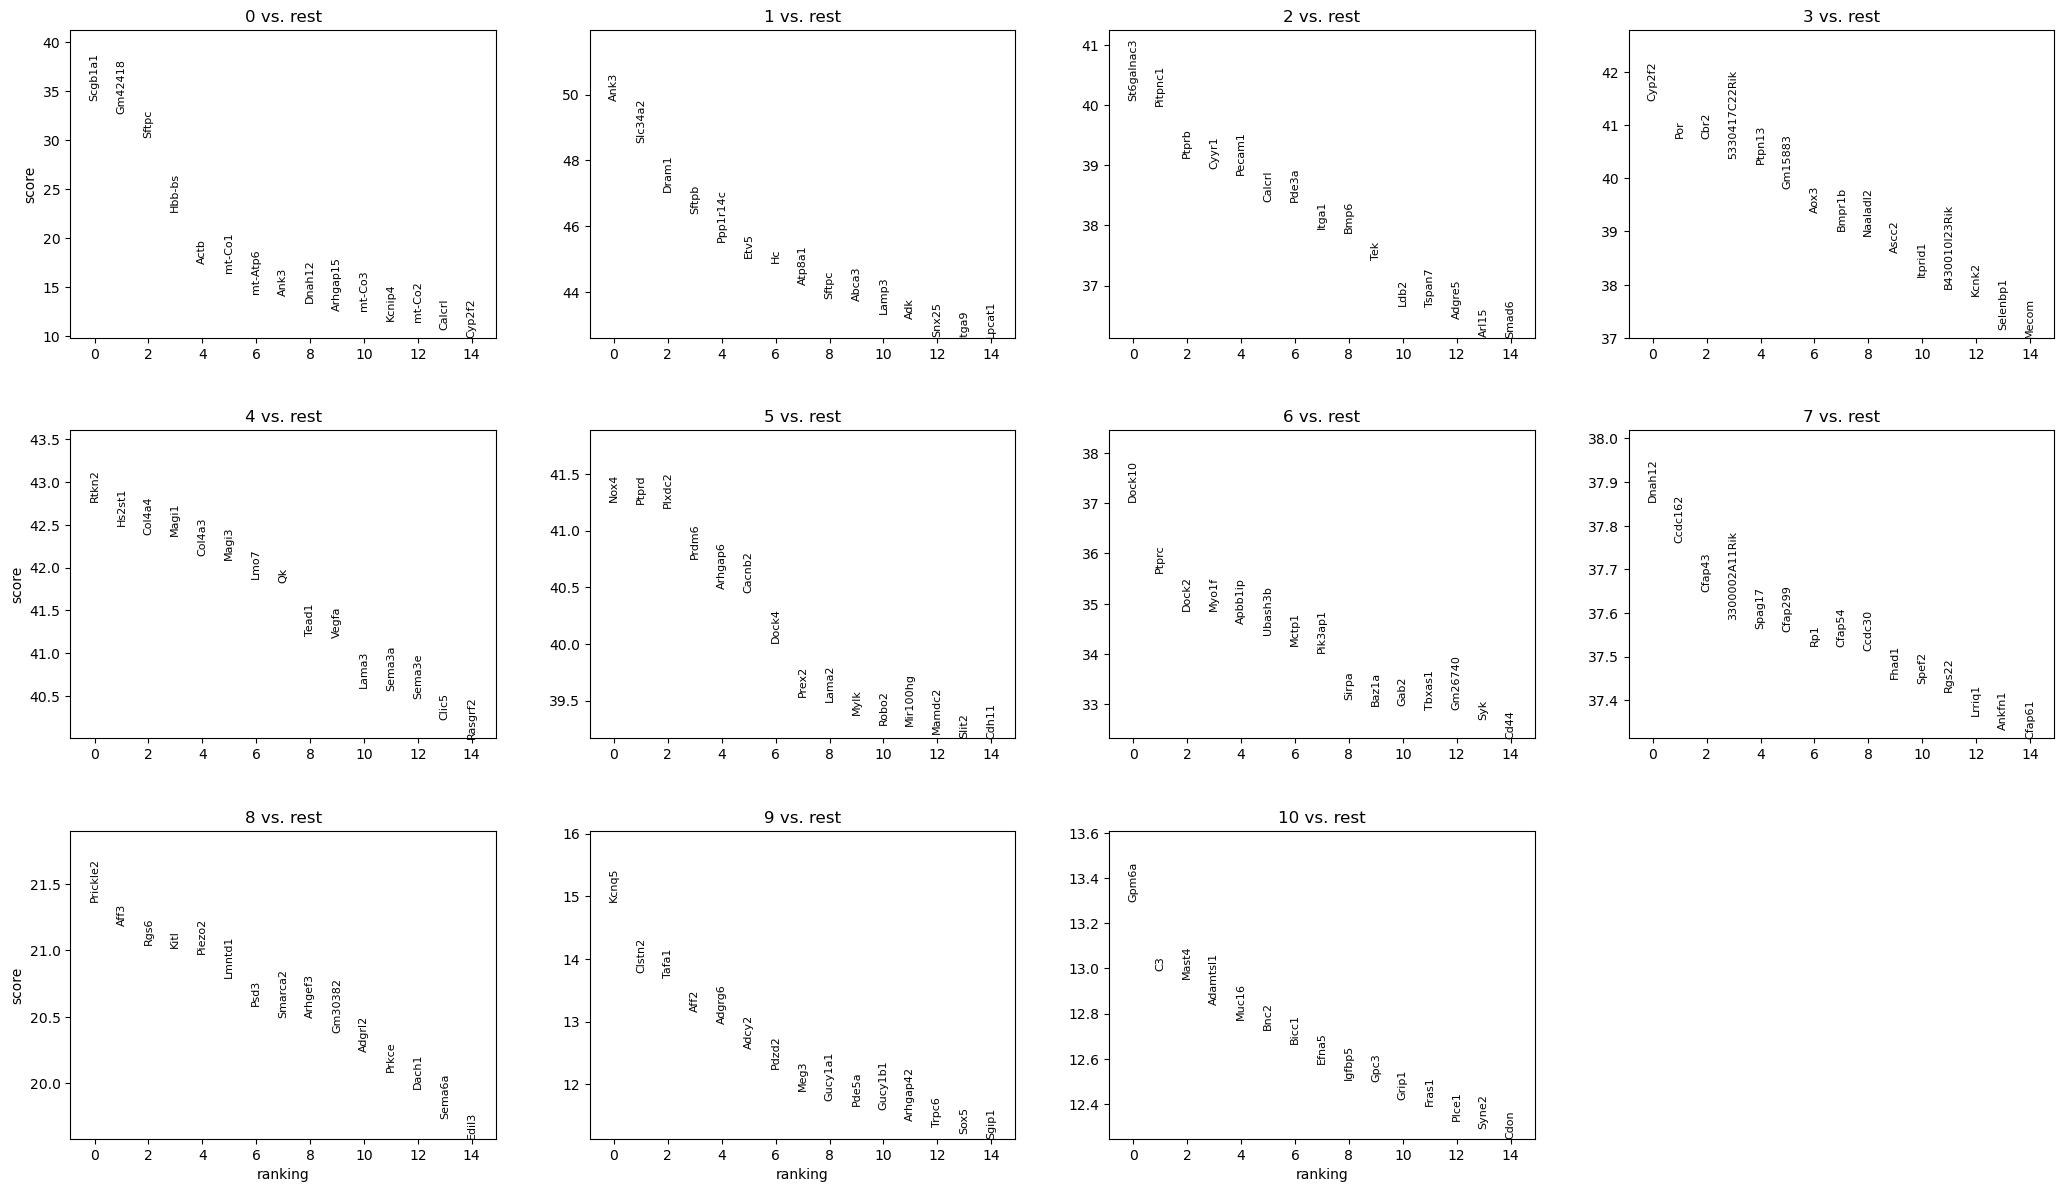

In [166]:
#computing the top 15genes in each cluster
#comparing cells from one cluster to the rest of the cells
sc.tl.rank_genes_groups(adata, "leiden", method = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes = 15, sharey = False) 

In [167]:
#creating a dataframe of top 15genes in each cluster
top_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

In [168]:
top_genes

,0,1,2,3,4,5,6,7,8,9,10
0,Scgb1a1,Ank3,St6galnac3,Cyp2f2,Rtkn2,Nox4,Dock10,Dnah12,Prickle2,Kcnq5,Gpm6a
1,Gm42418,Slc34a2,Pitpnc1,Por,Hs2st1,Ptprd,Ptprc,Ccdc162,Aff3,Clstn2,C3
2,Sftpc,Dram1,Ptprb,Cbr2,Col4a4,Plxdc2,Dock2,Cfap43,Rgs6,Tafa1,Mast4
3,Hbb-bs,Sftpb,Cyyr1,5330417C22Rik,Magi1,Prdm6,Myo1f,3300002A11Rik,Kitl,Aff2,Adamtsl1
4,Actb,Ppp1r14c,Pecam1,Ptpn13,Col4a3,Arhgap6,Apbb1ip,Spag17,Piezo2,Adgrg6,Muc16
5,mt-Co1,Etv5,Calcrl,Gm15883,Magi3,Cacnb2,Ubash3b,Cfap299,Lmntd1,Adcy2,Bnc2
6,mt-Atp6,Hc,Pde3a,Aox3,Lmo7,Dock4,Mctp1,Rp1,Psd3,Pdzd2,Bicc1
7,Ank3,Atp8a1,Itga1,Bmpr1b,Qk,Prex2,Pik3ap1,Cfap54,Smarca2,Meg3,Efna5
8,Dnah12,Sftpc,Bmp6,Naaladl2,Tead1,Lama2,Sirpa,Ccdc30,Arhgef3,Gucy1a1,Igfbp5
9,Arhgap15,Abca3,Tek,Ascc2,Vegfa,Mylk,Baz1a,Fhad1,Gm30382,Pde5a,Gpc3


In [169]:
top_genes.to_excel("top_15_genes.xlsx")

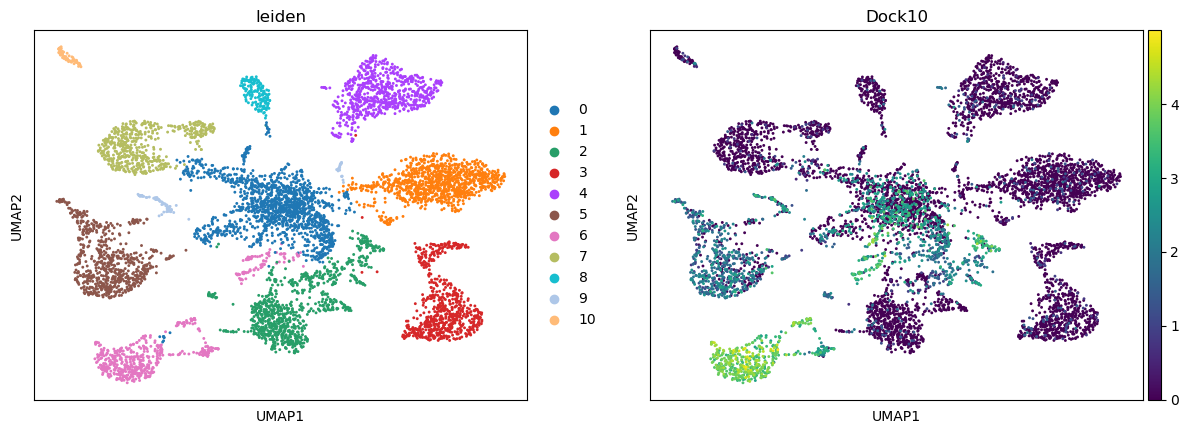

In [170]:
##plotting the gene expression along the clusters
sc.pl.umap(adata, color = ['leiden', 'Dock10'])

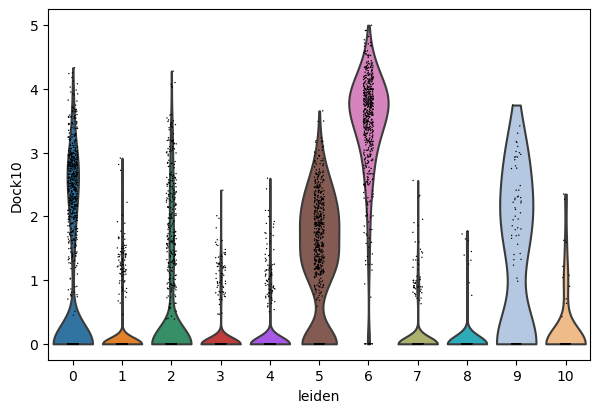

In [171]:
#if you want to compare certain gene expression across different clusters
sc.pl.violin(adata, ["Dock10"], groupby = "leiden")

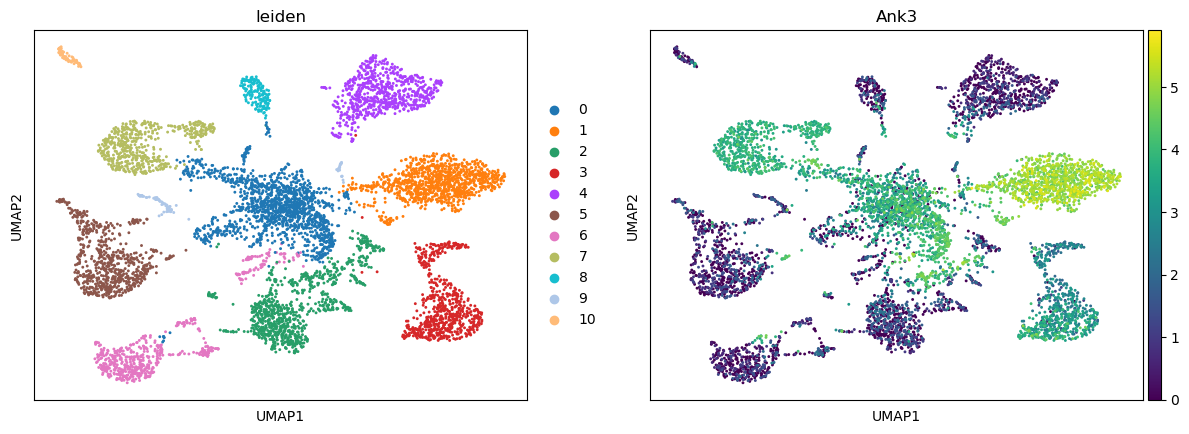

In [172]:
#plotting the gene expression along the clusters
sc.pl.umap(adata, color = ['leiden', 'Ank3'])

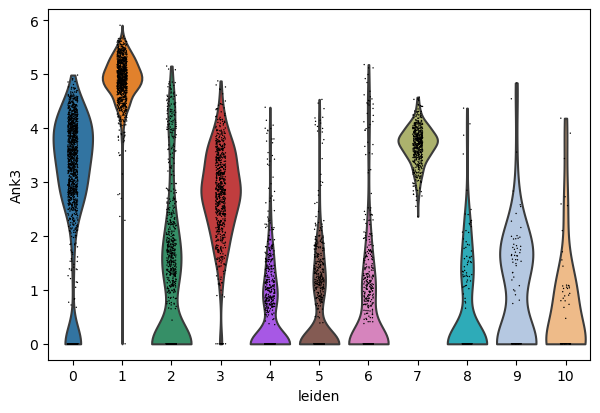

In [173]:
sc.pl.violin(adata, ["Ank3"], groupby = "leiden")

To make a dataframe for highly expressed genes in a cluster

categories: 0, 1, 2, etc.
var_group_labels: 1


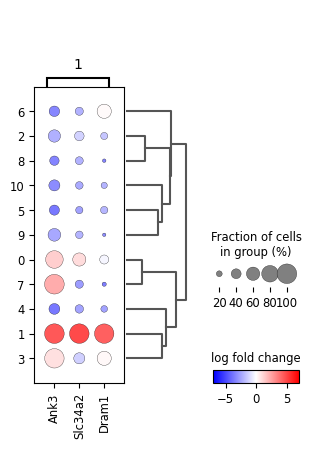

In [174]:
#dot plot showing the log fold changes
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr', groups = ['1'])

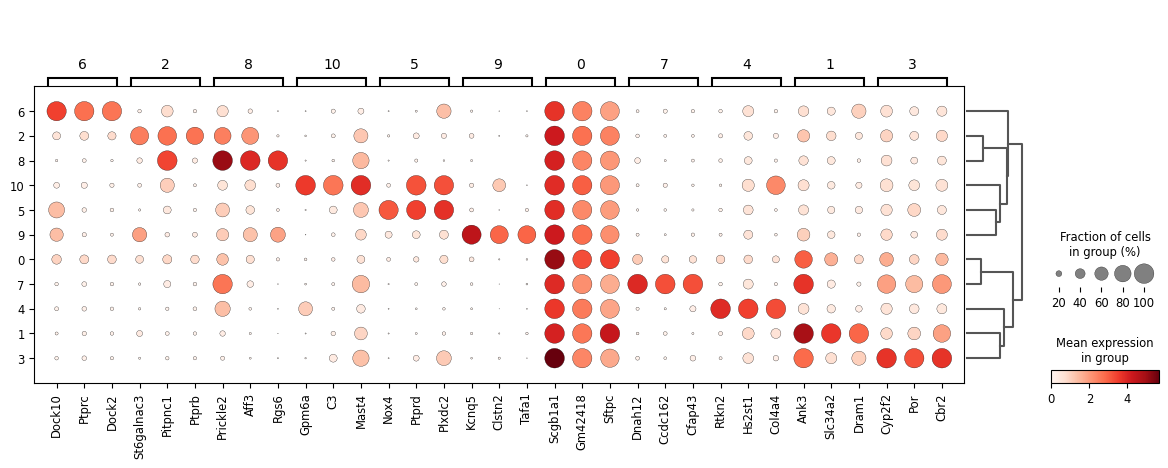

In [175]:
#dot plot showing the top 3 genes from each cluster
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3)

In [176]:
adata.uns["rank_genes_groups"]['names']["0"]

#to get all the genes from the cluster you want use the above code
#you can get information about names, scores, pvalues, adjusted pvalues and log fold changes

array(['Scgb1a1', 'Gm42418', 'Sftpc', ..., 'Zmiz1', 'Dock7', 'Cdkal1'],
      dtype=object)

In [177]:
#feeding the adata.uns output to results
results = adata.uns["rank_genes_groups"]
results["names"]["0"]

array(['Scgb1a1', 'Gm42418', 'Sftpc', ..., 'Zmiz1', 'Dock7', 'Cdkal1'],
      dtype=object)

In [178]:
results["names"].dtype.names

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')

In [179]:
#this will pullout the names, scores, pvals,adjusted pvals and log fold changes into an array
out = np.array([[0,0,0,0,0,0]])
for group in results["names"].dtype.names:
    out = np.vstack((out, np.vstack((results["names"][group],
                                    results["scores"][group],
                                     results["pvals"][group],
                                    results["pvals_adj"][group],
                                    results["logfoldchanges"][group],
                                    np.array([group] * len(results["names"][group])).astype("object"))).T))
out

array([[0, 0, 0, 0, 0, 0],
       ['Scgb1a1', 33.9943962097168, 2.6959106026763394e-253,
        5.70508601738367e-249, 1.3820382356643677, '0'],
       ['Gm42418', 32.74251174926758, 3.8806566123607196e-235,
        4.106122761538877e-231, 1.2246155738830566, '0'],
       ...,
       ['Zfp608', -7.96505069732666, 1.6515580363520399e-15,
        2.4440749066630676e-13, -2.6659629344940186, '10'],
       ['Pde4d', -8.189875602722168, 2.614963755476542e-16,
        4.256758691799583e-14, -2.4847068786621094, '10'],
       ['Mecom', -8.636445045471191, 5.798921525520655e-18,
        1.1156070665733465e-15, -3.6725525856018066, '10']], dtype=object)

In [180]:
#making a dataframe of all the gene markers
Gene_markers = pd.DataFrame(out[1:], columns = ["Gene" , "Scores" , "P_vales","Adjusted_P_values", "log_fold_changes" , "Cluster_Number"])
Gene_markers

,Gene,Scores,P_vales,Adjusted_P_values,log_fold_changes,Cluster_Number
0,Scgb1a1,33.994396,0.0,0.0,1.382038,0
1,Gm42418,32.742512,0.0,0.0,1.224616,0
2,Sftpc,30.217352,0.0,0.0,1.634903,0
3,Hbb-bs,22.735258,0.0,0.0,1.406129,0
4,Actb,17.371204,0.0,0.0,1.456895,0
...,...,...,...,...,...,...
232777,Arhgap31,-7.031745,0.0,0.0,-3.167042,10
232778,Sfta3-ps,-7.479514,0.0,0.0,-3.439924,10
232779,Zfp608,-7.965051,0.0,0.0,-2.665963,10
232780,Pde4d,-8.189876,0.0,0.0,-2.484707,10


In [181]:
markers = Gene_markers[(Gene_markers.Adjusted_P_values < 0.05) & (abs(Gene_markers.log_fold_changes) > 1)]
markers

,Gene,Scores,P_vales,Adjusted_P_values,log_fold_changes,Cluster_Number
0,Scgb1a1,33.994396,0.0,0.0,1.382038,0
1,Gm42418,32.742512,0.0,0.0,1.224616,0
2,Sftpc,30.217352,0.0,0.0,1.634903,0
3,Hbb-bs,22.735258,0.0,0.0,1.406129,0
4,Actb,17.371204,0.0,0.0,1.456895,0
...,...,...,...,...,...,...
232777,Arhgap31,-7.031745,0.0,0.0,-3.167042,10
232778,Sfta3-ps,-7.479514,0.0,0.0,-3.439924,10
232779,Zfp608,-7.965051,0.0,0.0,-2.665963,10
232780,Pde4d,-8.189876,0.0,0.0,-2.484707,10


In [182]:
#printing the table for the cells in cluster 6
markers[markers.Cluster_Number == "6"]

,Gene,Scores,P_vales,Adjusted_P_values,log_fold_changes,Cluster_Number
126972,Dock10,37.037804,0.0,0.0,5.405671,6
126973,Ptprc,35.6161,0.0,0.0,4.802555,6
126974,Dock2,34.869324,0.0,0.0,4.783376,6
126975,Myo1f,34.855232,0.0,0.0,5.229424,6
126976,Apbb1ip,34.605602,0.0,0.0,5.093596,6
...,...,...,...,...,...,...
148129,Pard3,-27.156851,0.0,0.0,-3.677389,6
148130,Ptprm,-27.514994,0.0,0.0,-3.895624,6
148131,Mecom,-27.568346,0.0,0.0,-4.113128,6
148132,Ptprk,-27.939045,0.0,0.0,-4.041811,6


In [183]:
#finding the index of Dock10 gene (and the last two zeros make sure we feed only the number into the variable)
Dock10_index = np.where(adata.raw.var_names == "Dock10")[0][0]
Dock10_index

463

In [184]:
#this creates an array with value of Dock10 that is present in the every cell
D_cell = adata.raw.X.toarray()[:,Dock10_index]
D_cell

array([0.        , 0.        , 0.        , ..., 2.9280574 , 0.        ,
       0.91227466], dtype=float32)

In [185]:
#adding a column to the adata observations and feeding the array values into it
#make sure to name the column differently from the gene name to avoid recepition of same value in the rows and columns
adata.obs["dock10"] = D_cell
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,dock10
AAACCCAAGAAAGCGA-1,2915,2914,7030.0,4.0,0.056899,0,0.000000
AAACCCAAGACATCAA-1,2721,2719,5786.0,12.0,0.207397,7,0.000000
AAACCCAAGGCCTGAA-1,2865,2865,7299.0,3.0,0.041102,7,0.000000
AAACCCAAGTCAGGGT-1,2135,2135,4340.0,3.0,0.069124,3,0.000000
AAACCCACATACAGAA-1,2827,2825,6953.0,13.0,0.186970,5,0.891272
...,...,...,...,...,...,...,...
TTTGTTGCACAATGAA-1,436,435,574.0,19.0,3.310104,0,0.000000
TTTGTTGCACTATCGA-1,2073,2072,5373.0,28.0,0.521124,4,0.000000
TTTGTTGCATCGCTAA-1,1295,1294,2261.0,6.0,0.265369,9,2.928057
TTTGTTGTCCCATTCG-1,2385,2383,6094.0,5.0,0.082048,4,0.000000


In [186]:
#calling the cells that have dock10 more than 0
adata.obs[adata.obs.dock10 > 0]

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,dock10
AAACCCACATACAGAA-1,2827,2825,6953.0,13.0,0.186970,5,0.891272
AAACCCATCGCAGAGA-1,3292,3292,8089.0,5.0,0.061812,6,1.244873
AAACCCATCGCGTGCA-1,1240,1240,1689.0,4.0,0.236827,0,1.934512
AAACCCATCTGCGGCA-1,2445,2444,5266.0,49.0,0.930498,5,1.568189
AAACGAACAACCAACT-1,885,884,1109.0,3.0,0.270514,0,2.304297
...,...,...,...,...,...,...,...
TTTGGAGGTGGTCAAG-1,2997,2997,6566.0,20.0,0.304599,5,0.925448
TTTGTTGAGGCCTAAG-1,3597,3596,9277.0,24.0,0.258704,1,0.731375
TTTGTTGCAAGAGGCT-1,1564,1564,2776.0,26.0,0.936599,1,1.526557
TTTGTTGCATCGCTAA-1,1295,1294,2261.0,6.0,0.265369,9,2.928057
